In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import random
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
shapes=['torus','cone','cylinder','cuboid','sphere']
colours=['Red','Grey','Brown','Green']
h=48
b=64

In [31]:
%cd '/content/drive/My Drive/Images'

/content/drive/My Drive/Images


In [32]:
def load(img_name):
  img=cv2.imread(img_name,0)
  img=cv2.resize(img,(960,540))
  img_new=img[106:488,245:754]
  img_new=cv2.resize(img_new,(b,h))
  img_new=img_new.reshape(h,b,1)
  return img_new


In [33]:
m_train=10000
m_valid=2000

In [34]:
train_data_gen=ImageDataGenerator(
    height_shift_range=0.1,
    width_shift_range=0.1,
    rotation_range=50,                                                
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True                       
)

valid_data_gen=ImageDataGenerator(
    rotation_range=50,                                                
    zoom_range=[0.6,1.1],
    horizontal_flip=True,
    vertical_flip=True                       
)

sphere_data_gen=ImageDataGenerator(
    height_shift_range=0.2,
    width_shift_range=0.2,
    rotation_range=50,                                                
    zoom_range=[0.8,1.2],
    horizontal_flip=True,
    vertical_flip=True                       
)

In [44]:
X_train=np.zeros([m_train,h,b,1])
y_train=np.zeros([m_train,1])

img_ind=0
for shape in shapes:
  if shape=='torus':
    m=0
    for colour in colours :
      filenames=glob.glob('Torus_'+colour+'/*.png')
      m+=len(filenames)

    train_X=np.zeros([m,h,b,1])
    train_y=np.zeros([m,1])

    ind=0
    for i in range(4):
      filenames=glob.glob('Torus_'+colours[i]+'/*.png')
      for image_name in filenames :
        train_X[ind]=load(image_name)
        train_y[ind]=0
        ind+=1

  else :
    m=0
    filenames=glob.glob(f'{shape}/*.png')
    m=len(filenames)

    train_X=np.zeros([m,h,b,1])
    train_y=np.zeros([m,1])

    ind=0
    for image_name in filenames :
       train_X[ind]=load(image_name)
       train_y[ind]=1
       ind+=1
  

  factor=int(m_train/(8*m))
  if shape=='sphere':
    for i in range(factor):                                                    
      it=sphere_data_gen.flow(train_X,train_y,batch_size=m)                        
      temp=next(it)
      X_train[img_ind+i*m:img_ind+(i+1)*m,:,:,:]=temp[0]                                 
      y_train[img_ind+i*m:img_ind+(i+1)*m,:]=temp[1]

  else :
    if shape=='torus':
      factor=int(m_train/(2*m))
    for i in range(factor):                                                    
      it=train_data_gen.flow(train_X,train_y,batch_size=m)                        
      temp=next(it)
      X_train[img_ind+i*m:img_ind+(i+1)*m,:,:,:]=temp[0]                                 
      y_train[img_ind+i*m:img_ind+(i+1)*m,:]=temp[1]
  
  
  img_ind+=m*factor



In [54]:
X_valid=np.zeros([m_valid,h,b,1])
y_valid=np.zeros([m_valid,1])

img_ind=0
for shape in shapes:
  if shape=='torus':
    m=0
    for colour in colours :
      filenames=glob.glob('Torus_'+colour+'/*.png')
      m+=len(filenames)

    valid_X=np.zeros([m,h,b,1])
    valid_y=np.zeros([m,1])

    ind=0
    for i in range(4):
      filenames=glob.glob('Torus_'+colours[i]+'/*.png')
      for image_name in filenames :
        valid_X[ind]=load(image_name)
        valid_y[ind]=0
        ind+=1

  else :
    m=0
    filenames=glob.glob(f'{shape}/*.png')
    m=len(filenames)

    valid_X=np.zeros([m,h,b,1])
    valid_y=np.zeros([m,1])

    ind=0
    for image_name in filenames :
       valid_X[ind]=load(image_name)
       valid_y[ind]=1
       ind+=1
  

  factor=int(m_valid/(8*m))
  if shape=='sphere':
    for i in range(factor):                                                    
      it=sphere_data_gen.flow(valid_X,valid_y,batch_size=m)                        
      temp=next(it)
      X_valid[img_ind+i*m:img_ind+(i+1)*m,:,:,:]=temp[0]                                 
      y_valid[img_ind+i*m:img_ind+(i+1)*m,:]=temp[1]

  else :
    if shape=='torus':
      factor=int(m_valid/(2*m))
    for i in range(factor):                                                    
      it=valid_data_gen.flow(valid_X,valid_y,batch_size=m)                        
      temp=next(it)
      X_valid[img_ind+i*m:img_ind+(i+1)*m,:,:,:]=temp[0]                                 
      y_valid[img_ind+i*m:img_ind+(i+1)*m,:]=temp[1]
  
  
  img_ind+=m*factor



In [55]:
pos=np.arange(len(y_train))
np.random.shuffle(pos)          
X_train=X_train[pos]
y_train=y_train[pos]

pos=np.arange(len(y_valid))
np.random.shuffle(pos)          
X_valid=X_valid[pos]
y_valid=y_valid[pos]

In [58]:
%cd '/content/drive/My Drive/Project_Data/Task_1a'

np.save('X_train',X_train)
np.save('y_train',y_train)
np.save('X_valid',X_valid)
np.save('y_valid',y_valid)

/content/drive/My Drive/Project_Data/Task_1a


In [43]:
print(img_ind,shape,i,factor,len(train_y))

4960 cone 30 31 20


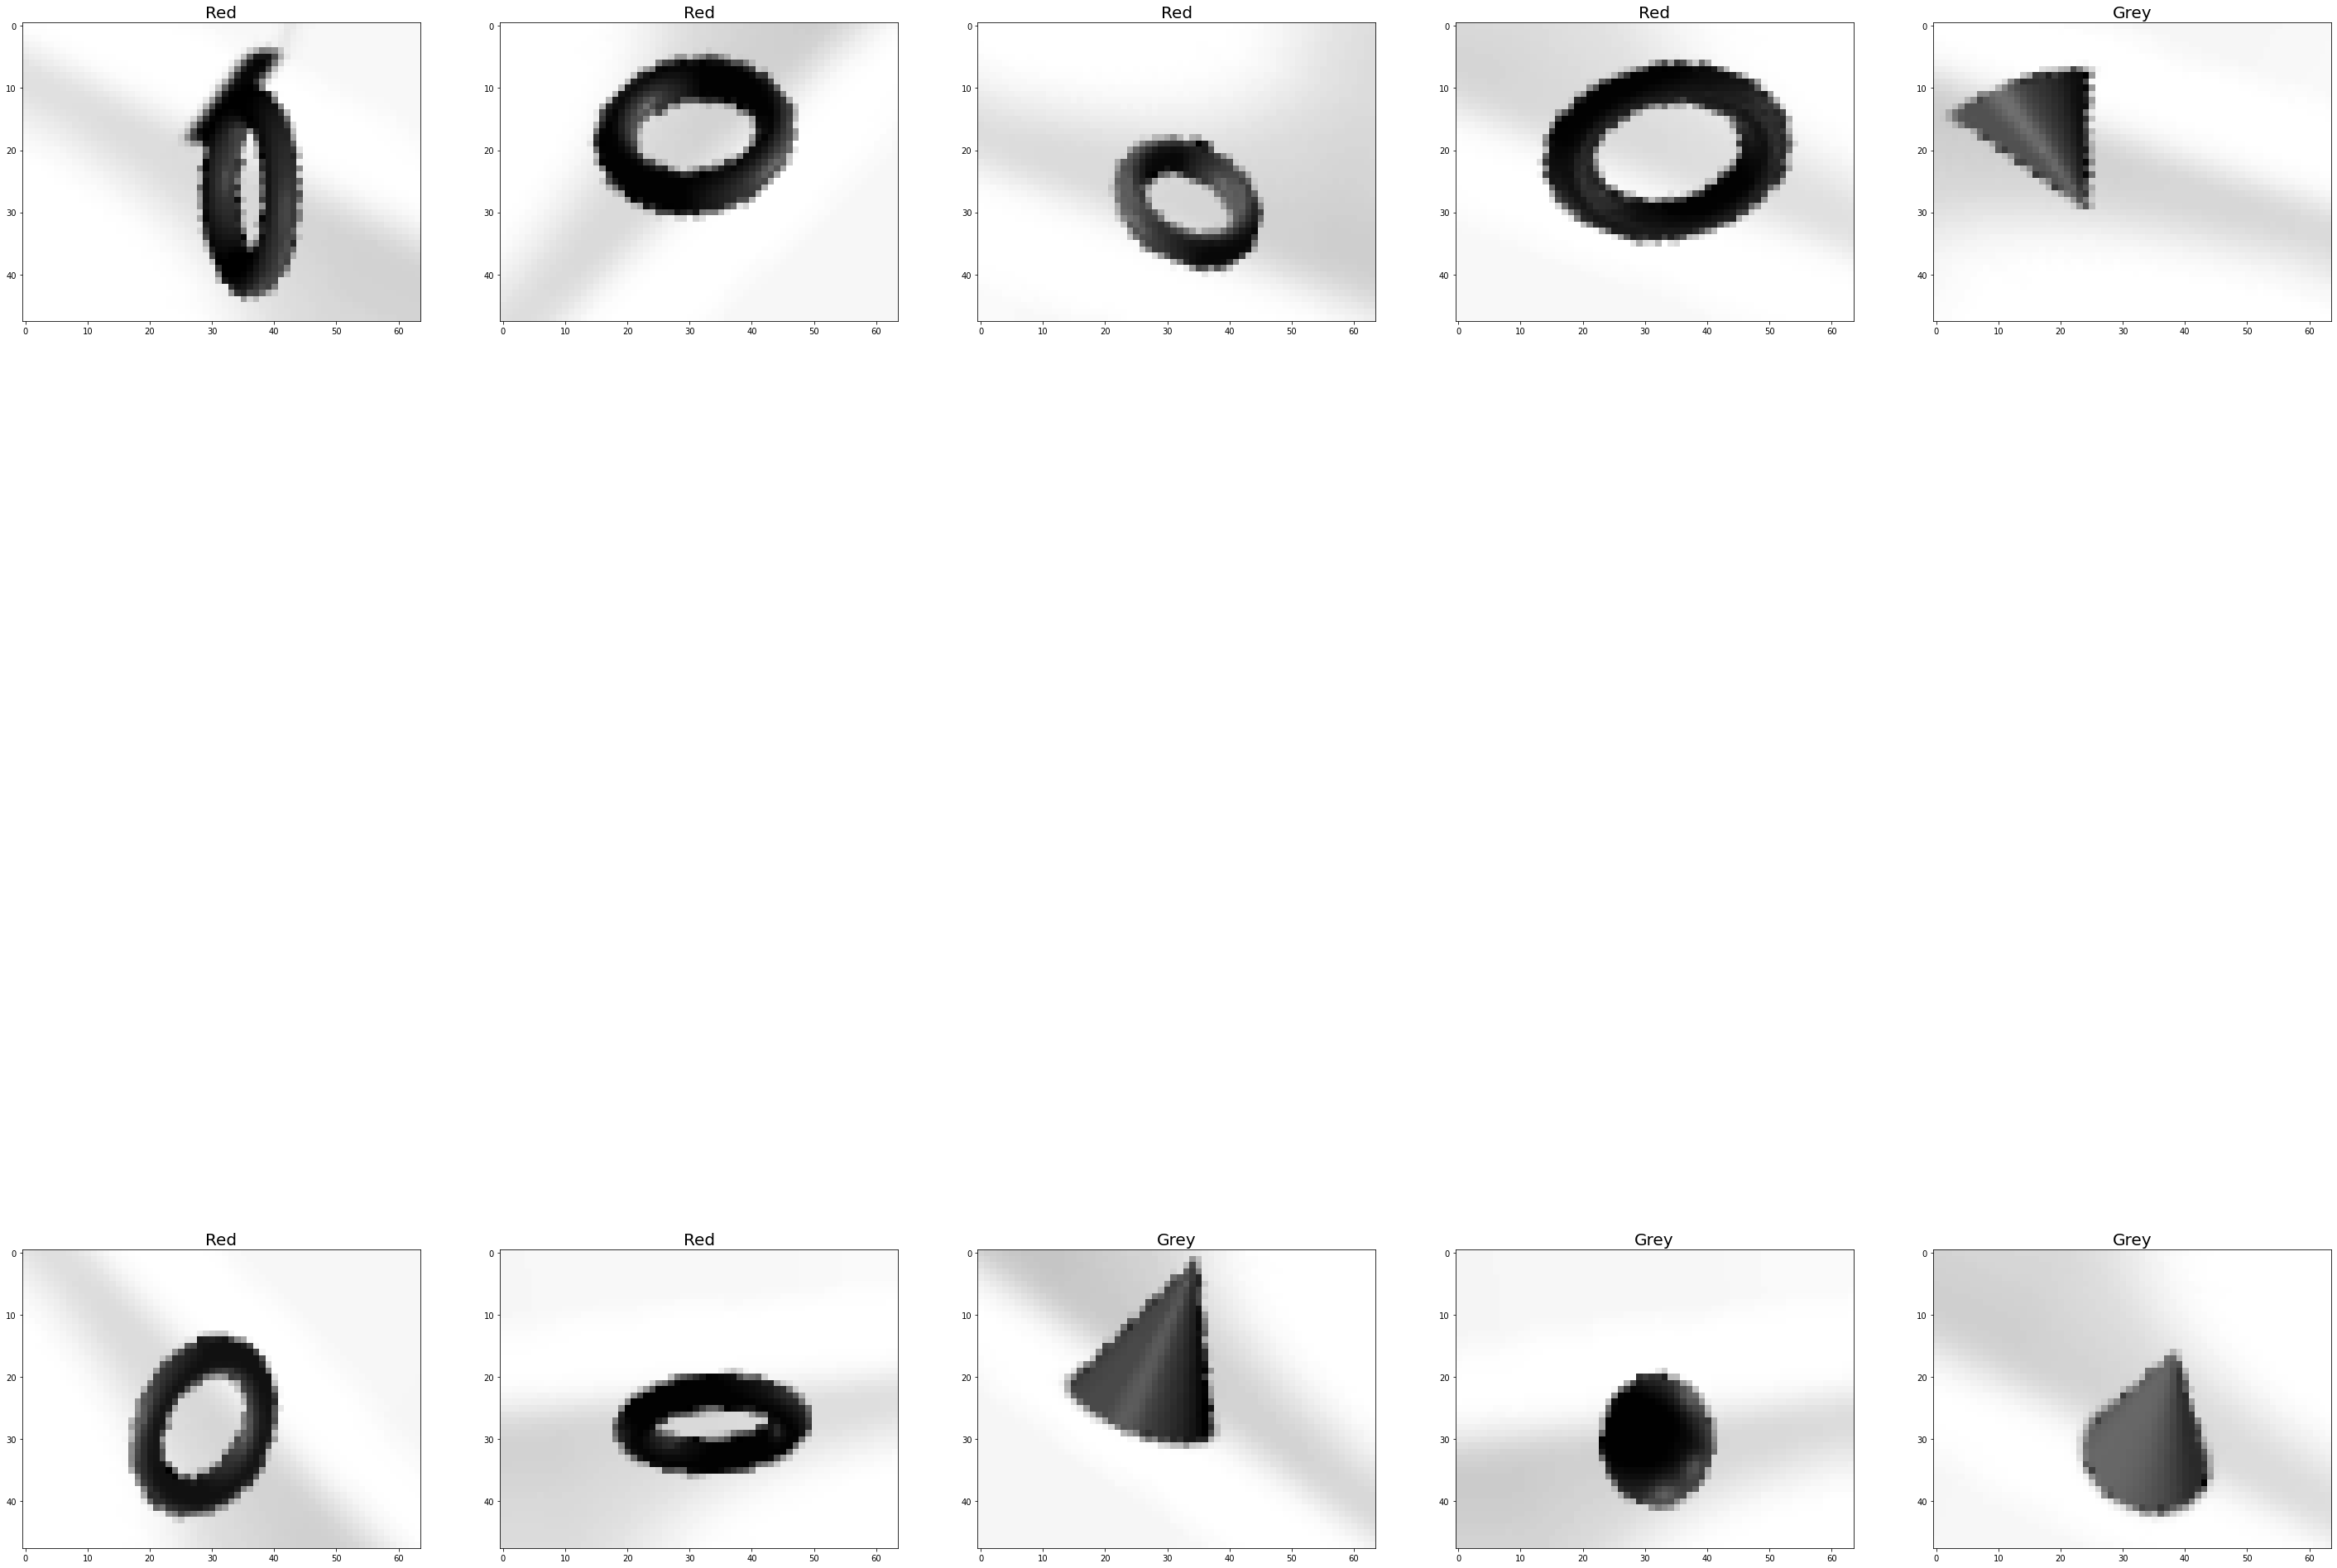

In [56]:
fig=plt.figure(figsize=(50,50))   
for i in range(10):
  startind=6000
  sub=fig.add_subplot(2,5,i+1)
  img=X_train[i+startind].copy()
  img=img.reshape((h,b))
  sub.imshow(img.astype(np.uint8),cmap='gray')
  #temp=y_train[i]
  plt.title(colours[int(y_train[i+startind])],fontsize=20)        
plt.show()

In [57]:
print(X_train.shape,X_valid.shape)

(10000, 48, 64, 1) (2000, 48, 64, 1)


In [ ]:
%cd '/content/drive/My Drive/Project_Data/Task_1b'

X_train=np.load('X_train.npy')
y_train=np.load('y_train.npy')
X_valid=np.load('X_valid.npy')
y_valid=np.load('y_valid.npy')

In [59]:
X_train=X_train/255.0
X_valid=X_valid/255.0

In [65]:
inputs=tf.keras.Input(shape=(h,b,1))

x=Conv2D(16,3,1,padding='same')(inputs)
#x=BatchNormalization()(x)
x=MaxPool2D(2,2,padding='valid')(x)

x=Conv2D(32,3,1,padding='same')(x)
x=Conv2D(32,3,1,padding='same')(x)
x=BatchNormalization()(x)
x=MaxPool2D(2,2,padding='valid')(x)

x=Conv2D(64,3,1,padding='same')(x)
x=Conv2D(64,3,1,padding='same')(x)
#x=BatchNormalization()(x)
x=MaxPool2D(2,2,padding='valid')(x)

x=Conv2D(128,3,1,padding='same')(x)
x=MaxPool2D(2,2,padding='valid')(x)

x=Flatten()(x)
output=Dense(8,activation='softmax')(x)

model=tf.keras.Model(inputs,output,name='model1b')

model.compile(optimizer='adagrad',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "model1b"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 64, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 64, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 32, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 32, 32)        4640      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 16, 32)        0   

In [ ]:
epochs=20
history=model.fit(X_train,
                  y_train,
                  batch_size=32,
                  epochs=epochs,
                  validation_data=(X_valid,y_valid))

Epoch 1/20
313/313 [==============================] - 61s 196ms/step - loss: 0.2218 - accuracy: 0.9269 - val_loss: 0.4238 - val_accuracy: 0.8550
Epoch 2/20
313/313 [==============================] - 61s 196ms/step - loss: 0.1031 - accuracy: 0.9627 - val_loss: 0.0908 - val_accuracy: 0.9675
Epoch 3/20
313/313 [==============================] - 61s 196ms/step - loss: 0.0866 - accuracy: 0.9650 - val_loss: 0.0774 - val_accuracy: 0.9705
Epoch 4/20
313/313 [==============================] - 62s 197ms/step - loss: 0.0765 - accuracy: 0.9687 - val_loss: 0.2000 - val_accuracy: 0.9455
Epoch 5/20
164/313 [==============>...............] - ETA: 28s - loss: 0.0705 - accuracy: 0.9726

Text(0.5, 1.0, 'Training and Validation Accuracy')

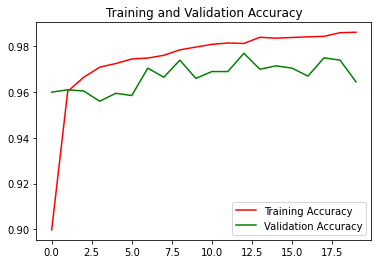

In [64]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

epochs_range=range(epochs)
plt.plot(epochs_range, acc, label='Training Accuracy',color='red')
plt.plot(epochs_range, val_acc, label='Validation Accuracy',color='green')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')